In [66]:
#Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
#Each example is a 28x28 grayscale image, associated with a label from 10 classes.

#Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
#Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.

##Each row is a separate image
#Column 1 is the class label.
#Remaining columns are pixel numbers (784 total).
#Each value is the darkness of the pixel (1 to 255)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras import Sequential 
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
X_train=x_train/255
X_test=x_test/255

In [ ]:
y_test.shape

(10000,)

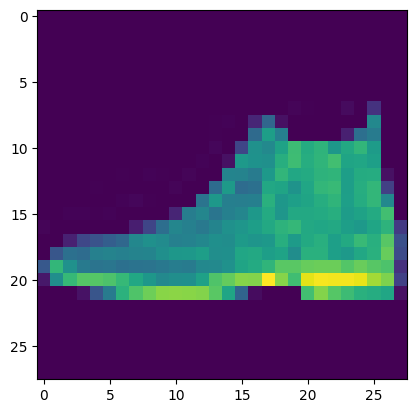

In [ ]:
plt.imshow(X_test[0])

In [ ]:
#To built Artificial neural network
#init the model
ann=Sequential()      
ann.add(Flatten(input_shape=(28,28)))
#add layers into model
ann.add(Dense(128,activation="relu"))
Dropout(0.3)
ann.add(BatchNormalization())
ann.add(Dense(80,activation="relu"))
Dropout(0.3)
ann.add(BatchNormalization())
ann.add(Dense(30,activation="relu"))
Dropout(0.3)
ann.add(BatchNormalization())
ann.add(Dense(10,activation="softmax"))
#Establish connection between the layers
ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)

In [ ]:
#train the model
history=ann.fit(X_train,y_train,epochs=40,validation_split=0.20,callbacks=[early_stop])

Epoch 1/40
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5350 - accuracy: 0.8146 - val_loss: 0.4739 - val_accuracy: 0.8333
Epoch 2/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4110 - accuracy: 0.8515 - val_loss: 0.4064 - val_accuracy: 0.8528
Epoch 3/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3751 - accuracy: 0.8640 - val_loss: 0.3688 - val_accuracy: 0.8646
Epoch 4/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3485 - accuracy: 0.8724 - val_loss: 0.3709 - val_accuracy: 0.8677
Epoch 5/40
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3276 - accuracy: 0.8781 - val_loss: 0.3591 - val_accuracy: 0.8730
Epoch 6/40
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3181 - accuracy: 0.8839 - val_loss: 0.3408 - val_accuracy: 0.8763
Epoch 7/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3084 - accuracy: 0.8856 - val_loss: 0.3498 - val_accur

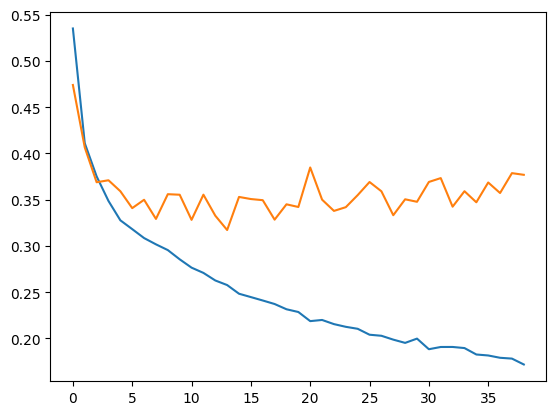

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


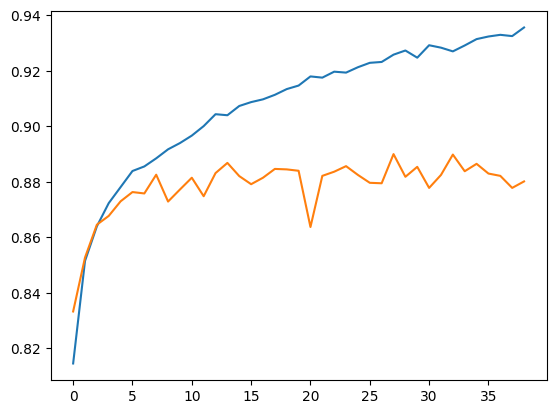

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
#make prediction
y_prob=ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_prob[0]

array([7.7303946e-07, 2.0279872e-08, 4.7074363e-07, 5.6305314e-08,
       5.6992715e-08, 2.1134540e-06, 7.8154267e-07, 7.9764542e-04,
       1.4505747e-06, 9.9919671e-01], dtype=float32)

In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.73      0.78      1000
           3       0.90      0.86      0.88      1000
           4       0.82      0.81      0.81      1000
           5       0.97      0.94      0.96      1000
           6       0.62      0.75      0.68      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000

